#**Tugas Kelompok 7 Machine Learning - Clustering**

Anggota Kelompok

In [1]:
print("Kelompok 7")
print("Hanyel Daryus Bancin - 20/455445/PA/19660 ")
print("M. Daffa Gashandy - 20/455449/PA/19664")
print("M. Farhan Dwi Rizqi - 20/459271/PA/19932")

Kelompok 7
Hanyel Daryus Bancin - 20/455445/PA/19660 
M. Daffa Gashandy - 20/455449/PA/19664
M. Farhan Dwi Rizqi - 20/459271/PA/19932


Link ke Google Collab

In [2]:
print("https://colab.research.google.com/drive/1J5xNkF0xI7D8lUNPesySFiLSikDvkbRo?usp=sharing")

https://colab.research.google.com/drive/1J5xNkF0xI7D8lUNPesySFiLSikDvkbRo?usp=sharing


#Import Dataset

Import Iibrary

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

Load Dataset marketing_campaign.csv

In [3]:
# Mengupload menggunakan metode import file dari directory PC
from google.colab import files
load_dataset = files.upload()

Saving marketing_campaign.csv to marketing_campaign.csv


In [7]:
import io
df = pd.read_csv(io.BytesIO(load_dataset['marketing_campaign.csv']))

#Operasi Dataset

a) Membaca file yang telah diupload dan Menampilkan 10 data pertama

In [8]:
data = pd.read_csv("marketing_campaign.csv")
# Mendapatkan 10 pertama dari data
data_first_10 = data.iloc[:10]

# Menampilkan 10 data pertama
data_first_10

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,9/9/2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,8/5/2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,6/6/2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


b) Menampilkan Informasi Fitur Data

In [ ]:
# Menampilkan informasi fitur data
data.info()

# Apakah ada Missing Value = Ada, yaitu Income sebanyak 24 data (Dari 2240 baris data, terdapat features yang tidak memiliki non-null data yang sesuai)

# Apakah ada Categorical Features = Ada, yaitu Education, Marital_Status(Dtype yang berupa "Object" merupakan Categorical Features)

# Dt_customer berupa int, diubah menajadi PCA_dstype datetime

# Jika ada beberapa Categorical Features = Ordinal Encoding

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [10]:
data['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [9]:
data['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

c) Data Cleaning

In [11]:
# Mendrop data yang memiliki nilai NA, sehingga data tersisa 2216
cleanedDF = df.dropna()

cleanedDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

In [12]:
# Mengubah Dt_Customer menjadi format waktu 
cleanedDF['Dt_Customer'] = pd.to_datetime(cleanedDF['Dt_Customer'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


d) Feature Engineering

In [13]:
# Mengurutkan berdasarkan waktu
cleanedDF.sort_values(by='Dt_Customer',ascending=False).head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2003,6679,1966,Graduation,Single,33279.0,0,0,2014-12-06,29,10,...,3,0,0,0,0,0,0,3,11,0
1952,3434,1951,Graduation,Single,80872.0,0,0,2014-12-05,60,483,...,1,0,0,0,0,0,0,3,11,0
288,10102,1966,Graduation,Widow,79946.0,0,0,2014-12-05,19,395,...,3,0,0,0,0,0,0,3,11,0
842,3312,1988,Graduation,Single,34176.0,1,0,2014-12-05,12,5,...,6,0,0,0,0,0,0,3,11,0
153,92,1988,Graduation,Alone,34176.0,1,0,2014-12-05,12,5,...,6,0,0,0,0,0,0,3,11,0
50,8614,1957,Graduation,Widow,65486.0,0,1,2014-12-05,29,245,...,2,0,0,0,0,0,0,3,11,0
216,7264,1978,2n Cycle,Single,52195.0,2,1,2014-12-05,2,12,...,8,0,0,0,0,0,0,3,11,0
1034,1020,1973,Graduation,Married,79593.0,0,0,2014-12-05,70,350,...,2,0,0,1,0,0,0,3,11,0
2155,8933,1983,2n Cycle,Married,32146.0,1,0,2014-12-05,16,26,...,6,0,0,0,0,0,0,3,11,0
1257,810,1975,Graduation,Married,74190.0,0,1,2014-12-05,49,151,...,2,0,0,0,0,0,0,3,11,0


In [17]:
# Fitur Enginering Customer_for
cleanedDF['Customer_for'] = ((cleanedDF.iloc[3]['Dt_Customer'] - cleanedDF.Dt_Customer)/np.timedelta64(1, 'D'))
cleanedDF['Customer_for'] = cleanedDF['Customer_for'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
# Fitur Engineering Age
cleanedDF['Age'] =( 2022 - cleanedDF.Year_Birth)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
# Fitur Engineering Spent
cleanedDF['Spent'] =( cleanedDF['MntWines'] + cleanedDF['MntFruits'] + cleanedDF['MntMeatProducts'] + cleanedDF['MntFishProducts'] + cleanedDF['MntSweetProducts'] + cleanedDF['MntGoldProds'] )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Fitur Engineering Living With
cleanedDF["Living_With"]=cleanedDF["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

In [21]:
# Fitur Engineering Children
cleanedDF["children"] = (cleanedDF["Kidhome"] + cleanedDF["Teenhome"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
# Fitur Engineering Family Size
cleanedDF["Family_Size"] = cleanedDF["Living_With"].replace({"Partner": 2 , "Alone" : 1}) +  + cleanedDF["children"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
# Fitur Engineering Is_parent
cleanedDF["Is_Parent"] = cleanedDF["Is_Parent"] = np.where(cleanedDF.children> 0, 1, 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
# Fitur Engineering Education
cleanedDF["Education"]=cleanedDF["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
# Mendrop Fitur Redudansi
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
cleanedDF = cleanedDF.drop(to_drop, axis=1)

e) Analalisis Statistik Deskriptif

In [26]:
cleanedDF.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Customer_for,children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,53.179603,607.075361,447.006318,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,11.985554,602.900476,232.469034,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,26.000000,5.000000,-65.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,45.000000,69.000000,275.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,52.000000,396.500000,448.000000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,63.000000,1048.000000,621.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,129.000000,2525.000000,998.000000,3.000000,5.000000,1.000000


Statistik di atas menunjukkan beberapa perbedaan dalam Pendapatan dan Usia rata-rata dan Pendapatan dan usia maks.

Perhatikan bahwa usia maksimal adalah 128 tahun, Karena dihitung berdasarkan tahun ini (yaitu 2022)

f) Plot (Outlier)

Reletive Plot Of Some Selected Features: A PCA_ds Subset


<Figure size 432x288 with 0 Axes>

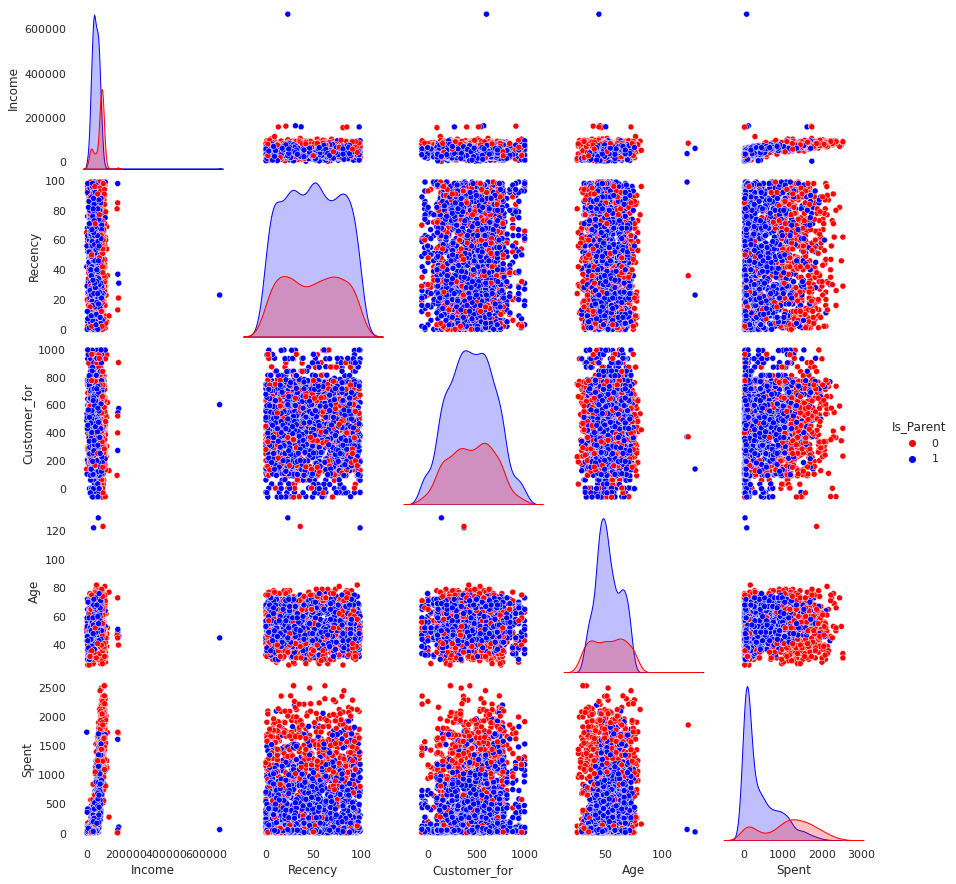

In [28]:
sns.set(rc={"axes.facecolor":"white","figure.facecolor":"white"})
pallet = ["blue", "green", "red", "purple", "yellow", "orange"]
cmap = colors.ListedColormap(["blue", "green", "red", "purple", "yellow", "orange"])
features = [ "Income", "Recency", "Customer_for", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A PCA_ds Subset")
plt.figure()
sns.pairplot(cleanedDF[features], hue= "Is_Parent",palette= (["red","blue"]))
plt.show()

g) Drop Outlier

In [29]:
# Menghapus outlier dengan menetapkan batas pada fitur yang memiliki sedikit outlier.
cleanedDF = cleanedDF[(cleanedDF["Age"]<90)]
cleanedDF = cleanedDF[(cleanedDF["Income"]<600000)]
print("total PCA_ds after removing outliers", len(cleanedDF))

total PCA_ds after removing outliers 2212


h) Correlation Matrix

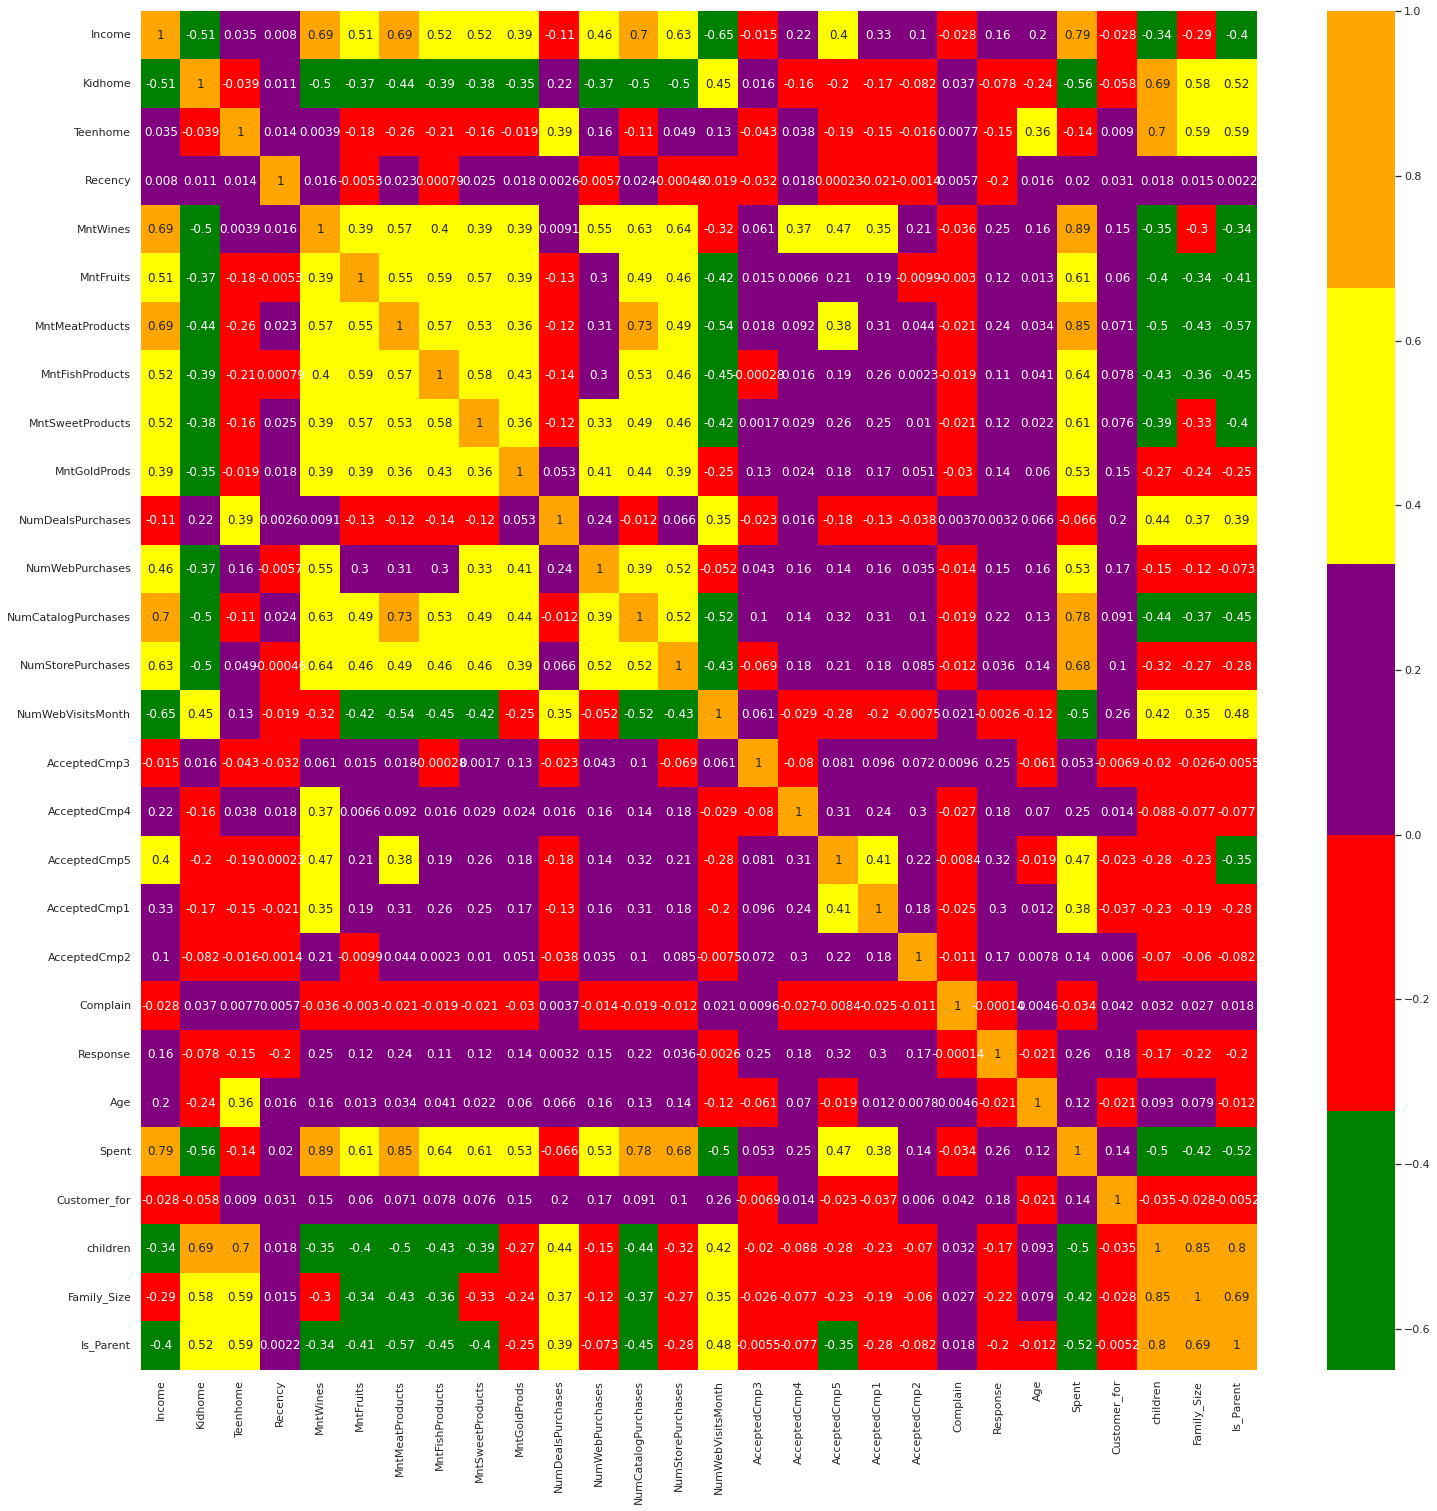

In [30]:
cormatrix= cleanedDF.corr()
plt.figure(figsize=(25,25))  
sns.heatmap(cormatrix,annot=True, cmap=cmap, center=0)

In [31]:
cleanedDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   object 
 1   Income               2212 non-null   float64
 2   Kidhome              2212 non-null   int64  
 3   Teenhome             2212 non-null   int64  
 4   Recency              2212 non-null   int64  
 5   MntWines             2212 non-null   int64  
 6   MntFruits            2212 non-null   int64  
 7   MntMeatProducts      2212 non-null   int64  
 8   MntFishProducts      2212 non-null   int64  
 9   MntSweetProducts     2212 non-null   int64  
 10  MntGoldProds         2212 non-null   int64  
 11  NumDealsPurchases    2212 non-null   int64  
 12  NumWebPurchases      2212 non-null   int64  
 13  NumCatalogPurchases  2212 non-null   int64  
 14  NumStorePurchases    2212 non-null   int64  
 15  NumWebVisitsMonth    2212 non-null   i

i) Data Preprocessing

In [34]:
# Telah diketahui pada poin sebelumnya bahwa terdapat categorical Feature
LE=LabelEncoder()
cleanedDF["Living_With"]=cleanedDF[["Living_With"]].apply(LE.fit_transform)

In [36]:
cleanedDF["Education"]=cleanedDF[["Education"]].apply(LE.fit_transform)

In [38]:
subsetDF = cleanedDF.copy()

# Membuat subset dataframe
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
subsetDF = subsetDF.drop(cols_del, axis='columns')

#Scaling
scaler = StandardScaler()
scaler.fit(subsetDF)

StandardScaler()

In [39]:
scaled_ds = pd.DataFrame(scaler.transform(subsetDF),columns= subsetDF.columns )
print("All features are now scaled")

All features are now scaled


In [58]:
scaled_ds.head(3)

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent,Customer_for,Living_With,children,Family_Size,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.018352,1.676245,1.973583,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,1.274785,-0.963297,-1.665144,-1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,0.334530,0.280110,-0.172664,0.740959,-1.264598,-0.654644,-1.581139


j) Dimensionality Reduction

In [41]:
# Menginisiasi PCA untuk mengurangi fitur ke 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,6.424437e-17,2.878377,-5.969395,-2.538494,-0.780421,2.383290,7.444305
col2,2212.0,-3.854662e-17,1.706839,-4.312184,-1.328315,-0.158114,1.242283,6.142713
col3,2212.0,-1.043971e-17,1.221955,-3.530091,-0.828178,-0.021346,0.799620,6.615593


k) Clustering Group

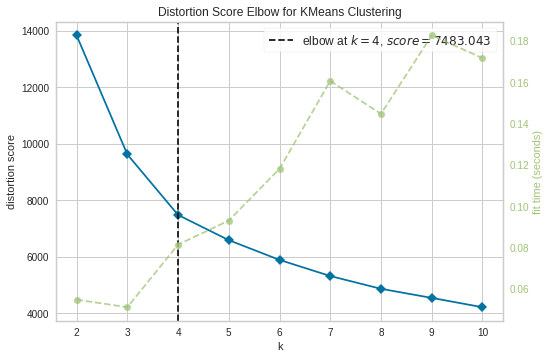

In [59]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

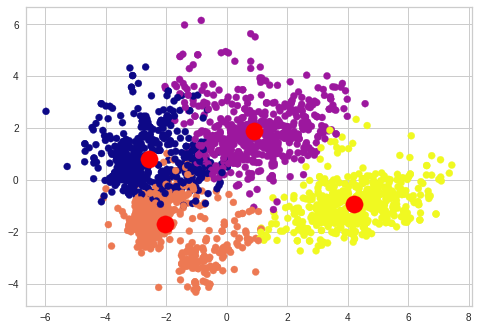

In [60]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(PCA_ds)
plt.scatter(PCA_ds.iloc[:,0], PCA_ds.iloc[:,1], c = kmeans.labels_ , cmap = 'plasma')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

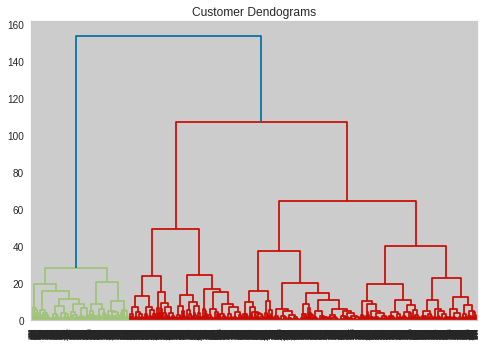

In [61]:
import scipy.cluster.hierarchy as shc

plt.figure()
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(PCA_ds, method='ward'))

In [65]:
from sklearn.cluster import AgglomerativeClustering

Agglocluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
Agglocluster.fit_predict(PCA_ds)

array([3, 2, 3, ..., 3, 0, 0])

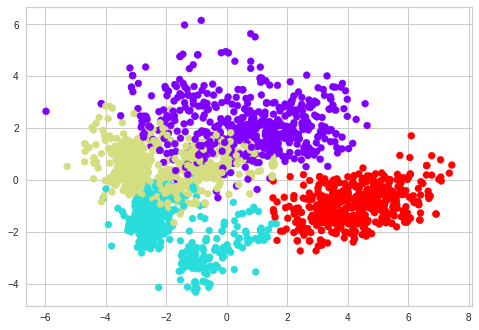

In [63]:
plt.figure()
plt.scatter(PCA_ds.iloc[:,0], PCA_ds.iloc[:,1], c=Agglocluster.labels_, cmap='rainbow')

Estimated no. of clusters: 4
Estimated no. of noise points: 792


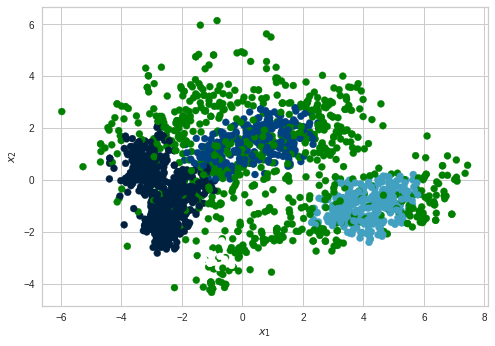

In [66]:
dbscan_cluster = DBSCAN(eps=0.7, min_samples=25)
dbscan_cluster.fit(PCA_ds)

# Visualizing DBSCAN
plt.scatter(PCA_ds.iloc[:, 0], 
PCA_ds.iloc[:, 1], 
c=dbscan_cluster.labels_, 
label=dbscan_cluster.labels_,cmap= 'ocean')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

# Number of Clusters
labels=dbscan_cluster.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)


dengan menggunakan eps 0.7 dan minimum sample 25 dihasilkan 4 buah cluster dengan hasil berupa diatas

l) Analisis Cluster

Hasil ketiga clustering cukup berbeda. untuk kmeans dan agglomorative memiliki beberapa kesamaan karena kedua nya setelah dicek dengan elbow method dan dendogram menghasilkan cluster optimal 4 buah. tetapi terlihat perbedaan pada cluster sebelah kanan, menurut kmeans ada beberapa data yang lebih dekat dengan centroid kanan bawah sedangkan menurut agglomorative data tersebut lebih similar dengan cluster kanan atas. sedangkan untuk clustering DBSCAN menggunakan epsilon 0.7 dan minsample 25 hasil nya jauh berbeda karena akan menghasilkan 4 buah cluster. di dbscan juga ternyata dihasilkan 787 data yang merupakan noise atau tidak termasuk ke cluster manapun.berbeda dengan kmeans clustering yang akan memaksakan semua data untuk masuk ke cluster dengan mereposisi centroid